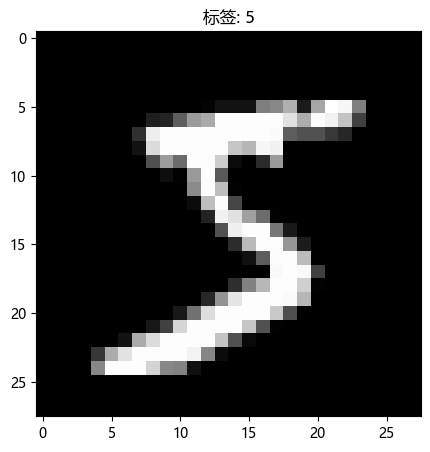

训练集形状: (56000, 784)
测试集形状: (200, 784)


In [15]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体（根据系统选择合适的字体）
plt.rcParams["font.family"] = ["Microsoft YaHei"]
# 解决负号显示问题（可选）
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

'''
加载MNIST数据
'mnist_784'：数据集的唯一标识符（在 OpenML 中名为 "mnist_784"）
version=1：指定数据集版本（避免未来数据更新导致结果不一致）
as_frame=False：返回 NumPy 数组而非 Pandas DataFrame（便于机器学习处理）
'''

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

sample_idx = 0   # 随便选1个图像显示
sample_image = X[sample_idx].reshape(28, 28)  # 重塑为28×28矩阵

plt.figure(figsize=(5, 5))
plt.imshow(sample_image, cmap='gray')
plt.title(f"标签: {y[sample_idx]}")
plt.axis('on')  # 关闭坐标轴
plt.show()

ratio = 0.8
split = int(len(X)*ratio)

np.random.seed(0)
idx = np.random.permutation(np.arange(len(X))) # 若X长度为 5，np.arange(len(X))生成[0, 1, 2, 3, 4]，随机排列后可能变为[3, 0, 4, 1, 2]。
# 数据重排：X=X[idx] 和 y=y[idx] 借助高级索引的方式，依据随机生成的索引 idx 对 X 和 y 里的元素进行重新排列。
X=X[idx]
y=y[idx]

# 划分训练集和测试集
# x_train, x_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]
x_train, x_test = X[:split], X[split:split+200]
y_train, y_test = y[:split], y[split:split+200]

print("训练集形状:", x_train.shape)  # (60000, 784)
print("测试集形状:", x_test.shape)   # (10000, 784)

In [16]:
def distance(a,b):# 定义了一个计算欧几里得距离的函数
    return np.sqrt(np.sum(np.square(a-b)))

In [17]:
class KNN:
    def __init__(self,k,label_num):
        self.k = k
        self.label_num = label_num # 类别的数量
    def fit(self,x_train,y_train):
        # 在类中保存训练数据
        self.x_train = x_train
        self.y_train = y_train
    def get_knn_indices(self,x):
        # 获取距离目标样本点最近的K个样本点的下标
        # 计算已知样本到目标样本的距离
        dis = list(map(lambda a:distance(a,x),self.x_train))
        # 按距离从小到大排序，并得到对应的下标
        knn_indices = np.argsort(dis)
        # 取最近的K个下标
        knn_indices = knn_indices[:self.k]
        return knn_indices
    def get_label(self,x):
        # 对KNN方法的具体实现，观察K个近邻并使用np.argmax获取其中数量最多的类别
        knn_indices =self.get_knn_indices(x)
        # 类别计数
        label_statistic = np.zeros(shape=[self.label_num])
        for index in knn_indices:
            label = int(self.y_train[index])
            label_statistic[label] += 1
        # 返回数量最多的类别
        return np.argmax(label_statistic)
    def predict(self,x_test):
        # 预测样本test_x的类别 
        predicted_test_labels = np.zeros(shape=[len(x_test)],dtype=int)
        for i,x in enumerate(x_test):
            predicted_test_labels[i] = self.get_label(x)
        return predicted_test_labels

In [18]:
for k in range(1,5):
    knn = KNN(k,label_num=10)
    print(f"当前k值: {k}, 模型k参数: {knn.k}")  # 确认k是否正确传入模型
    # ... 其余代码保持不变
    knn.fit(x_train,y_train)
    predicted_labels = knn.predict(x_test)
    # # 修改部分：将 y_test 转换为整数类型
    y_test_int = y_test.astype(int)
    print(y_test_int)
    print(predicted_labels)
    accuracy = np.mean(predicted_labels == y_test_int)
    print(f'k的取值为{k}，预测准确率为{accuracy * 100:.1f}%')
    

当前k值: 1, 模型k参数: 1
[2 7 7 3 1 3 1 7 3 7 2 0 2 7 4 2 0 1 5 8 4 1 6 2 9 2 5 3 7 7 3 4 1 9 8 3 2
 0 4 1 7 4 9 8 0 6 5 7 2 2 1 1 9 5 6 5 8 6 3 0 6 2 4 7 9 0 6 3 0 4 9 8 3 6
 6 4 9 2 3 7 4 9 4 7 2 5 4 4 9 5 6 7 0 4 2 3 6 2 7 9 1 0 1 5 3 5 6 1 2 5 5
 5 7 0 2 2 5 4 5 3 0 9 5 2 6 7 7 1 9 7 6 1 2 9 1 7 1 7 3 2 6 2 5 6 2 2 8 4
 6 4 7 1 4 9 4 1 0 2 8 7 4 4 0 4 6 9 1 1 6 5 2 2 8 9 3 4 8 9 7 6 2 2 9 7 0
 7 6 8 7 3 2 7 4 9 0 6 0 4 5 4]
[2 7 7 3 1 3 1 7 3 7 2 0 2 7 4 2 0 1 5 8 4 1 6 2 9 2 5 3 7 7 3 4 1 9 8 3 2
 0 4 1 7 4 9 8 0 6 5 7 2 2 1 1 9 5 6 5 8 6 3 0 6 2 4 7 9 0 6 3 0 4 3 8 3 6
 6 4 9 2 3 7 4 9 4 7 2 5 4 4 9 5 6 7 0 4 2 3 6 2 7 9 1 0 1 4 3 5 6 1 2 5 5
 5 7 0 0 2 5 4 5 3 0 9 5 2 6 7 7 1 9 7 6 1 2 9 1 7 1 7 3 2 6 2 5 6 2 0 8 4
 6 4 7 1 4 9 4 1 0 2 8 7 4 4 0 4 6 9 1 1 6 5 2 2 8 9 3 4 4 9 7 6 2 2 9 7 0
 7 6 4 7 3 2 7 4 9 0 6 0 4 5 4]
k的取值为1，预测准确率为97.0%
当前k值: 2, 模型k参数: 2
[2 7 7 3 1 3 1 7 3 7 2 0 2 7 4 2 0 1 5 8 4 1 6 2 9 2 5 3 7 7 3 4 1 9 8 3 2
 0 4 1 7 4 9 8 0 6 5 7 2 2 1 1 9 5 6 5 8 6 3 0 6 2 4 7 9